In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("telecom_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop(["customerID"],axis=1, inplace=True)

In [7]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [8]:
df_num=df.select_dtypes(['int64','float64'])

In [9]:
df_cat=df.select_dtypes(['object'])

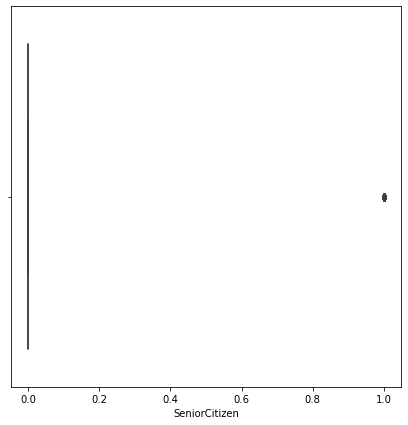

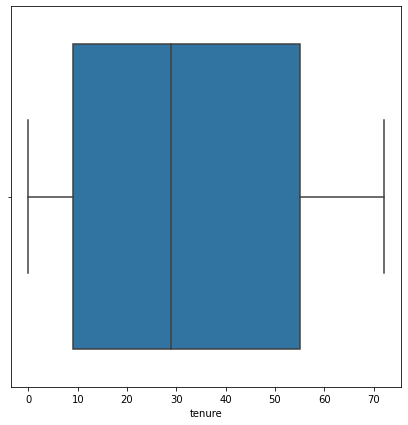

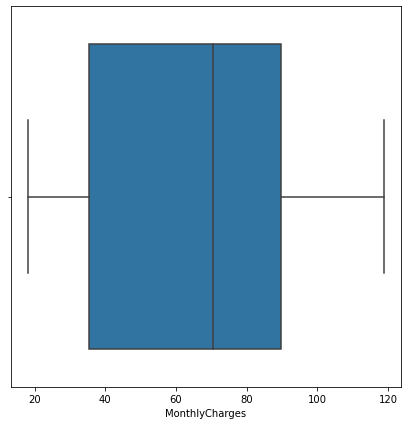

In [10]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder 

In [12]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [13]:
df_new=pd.merge(df_num,df_cat,on="ID")

In [14]:
df_new

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
ID,,,,,,,,,,,,,,,,,,,,
1,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
2,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
3,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
4,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
5,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,0,24,84.80,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7040,0,72,103.20,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7041,0,11,29.60,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0


In [15]:
x=df_new.drop("Churn",axis=1)
y=df_new["Churn"]

In [16]:
ss=StandardScaler()
x = ss.fit_transform(x)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [18]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(2, activation="relu", input_shape=(x.shape[1],)),
     tf.keras.layers.Dense(3, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid")]
)

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer="sgd", loss="binary_crossentropy")

In [21]:
trained_model = model.fit(x_train, y_train, epochs=50, batch_size=20)

Epoch 1/50
247/247 [==============================] - 1s 523us/step - loss: 0.6019
Epoch 2/50
247/247 [==============================] - 0s 523us/step - loss: 0.5238
Epoch 3/50
247/247 [==============================] - 0s 503us/step - loss: 0.4849
Epoch 4/50
247/247 [==============================] - 0s 503us/step - loss: 0.4763
Epoch 5/50
247/247 [==============================] - 0s 555us/step - loss: 0.4623
Epoch 6/50
247/247 [==============================] - 0s 515us/step - loss: 0.4526
Epoch 7/50
247/247 [==============================] - 0s 503us/step - loss: 0.4500
Epoch 8/50
247/247 [==============================] - 0s 491us/step - loss: 0.4513
Epoch 9/50
247/247 [==============================] - 0s 507us/step - loss: 0.4386
Epoch 10/50
247/247 [==============================] - 0s 503us/step - loss: 0.4332
Epoch 11/50
247/247 [==============================] - 0s 499us/step - loss: 0.4234
Epoch 12/50
247/247 [==============================] - 0s 499us/step - loss: 0.4318
E

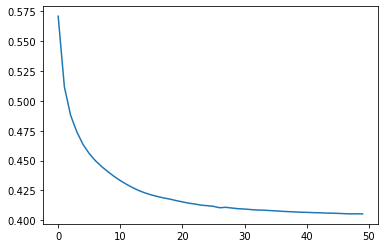

In [22]:
plt.plot(trained_model.history["loss"])
plt.show()

In [23]:
y_hat = model.predict(x_test)

In [24]:
y_hat

array([[0.09079063],
       [0.17288956],
       [0.01384917],
       ...,
       [0.1909835 ],
       [0.5906654 ],
       [0.46951127]], dtype=float32)

In [25]:
y_hat1 = np.where(y_hat >= 0.5, 1, 0)

In [26]:
y_hat1.flatten()

array([0, 0, 0, ..., 0, 1, 0])

In [27]:
roc_auc_score(y_test, y_hat1)

0.7056512059784311